In [1]:
import cv2
import matplotlib.pyplot as plt
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"
 


model = cv2.dnn_DetectionModel(frozen_model, config_file)

class_labels = []
file_name = "labels.txt"
with open(file_name, 'rt') as fpt:
    class_labels = fpt.read().rstrip('\n').split('\n')

# print(class_labels)

# Read Image

img = cv2.imread("static/images/img4.jpg")
# cv2.imshow("image", img)
# cv2.waitKey(0)

In [2]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 0000020892BF6570>

In [3]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.50)

In [4]:
print(ClassIndex)

[[3]
 [3]
 [3]
 [6]
 [6]
 [3]]


In [5]:
font_scale = 10
font = cv2.FONT_ITALIC
for classind, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 255, 255), 5)
    cv2.putText(img, class_labels[classind-1], (boxes[0]+10,boxes[1]+40), font, fontScale = font_scale, color = (255,0,0), thickness=8)
#     print(boxes)

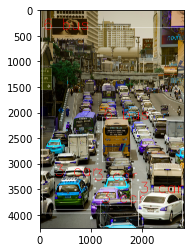

In [6]:
plt.imshow(img)

In [8]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Can't Open Video")

font_scale = 1.5
font = cv2.FONT_ITALIC

while True:
    rate, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    # print(ClassIndex)
    if len(ClassIndex) != 0:
        for class_id, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if class_id <= 80:
                cv2.rectangle(frame, boxes, (0, 0, 0), 2)
                cv2.putText(frame, class_labels[class_id-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness=3)

    cv2.imshow("Video", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()